In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import random

%config InlineBackend.figure_format ='retina'
%matplotlib inline

### Задание 1.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпирической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

(Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

In [2]:
from scipy.stats import norm
from matplotlib.pyplot import figure

In [3]:
# генерируем выборку из стандартного нормального распределения для  N=10^4
X = norm.rvs(size=1000)

In [4]:
n = [10,25,50,100,1000,10000]

In [5]:
# выбираем подвыборки
X_10 = random.choices(X, k=n[0])
X_25 = random.choices(X, k=n[1])
X_50 = random.choices(X, k=n[2])
X_100 = random.choices(X, k=n[3])
X_1000 = random.choices(X, k=n[4])

X_10.sort()
X_25.sort()
X_50.sort()
X_100.sort()
X_1000.sort()
X.sort()

In [6]:
Y_10 = [i/len(X_10) for i in range(1, len(X_10)+1)]
Y_25 = [i/len(X_25) for i in range(1, len(X_25)+1)]
Y_50 = [i/len(X_50) for i in range(1, len(X_50)+1)]
Y_100 = [i/len(X_100) for i in range(1, len(X_100)+1)]
Y_1000 = [i/len(X_1000) for i in range(1, len(X_1000)+1)]
Y = [i/len(X) for i in range(1, len(X)+1)]

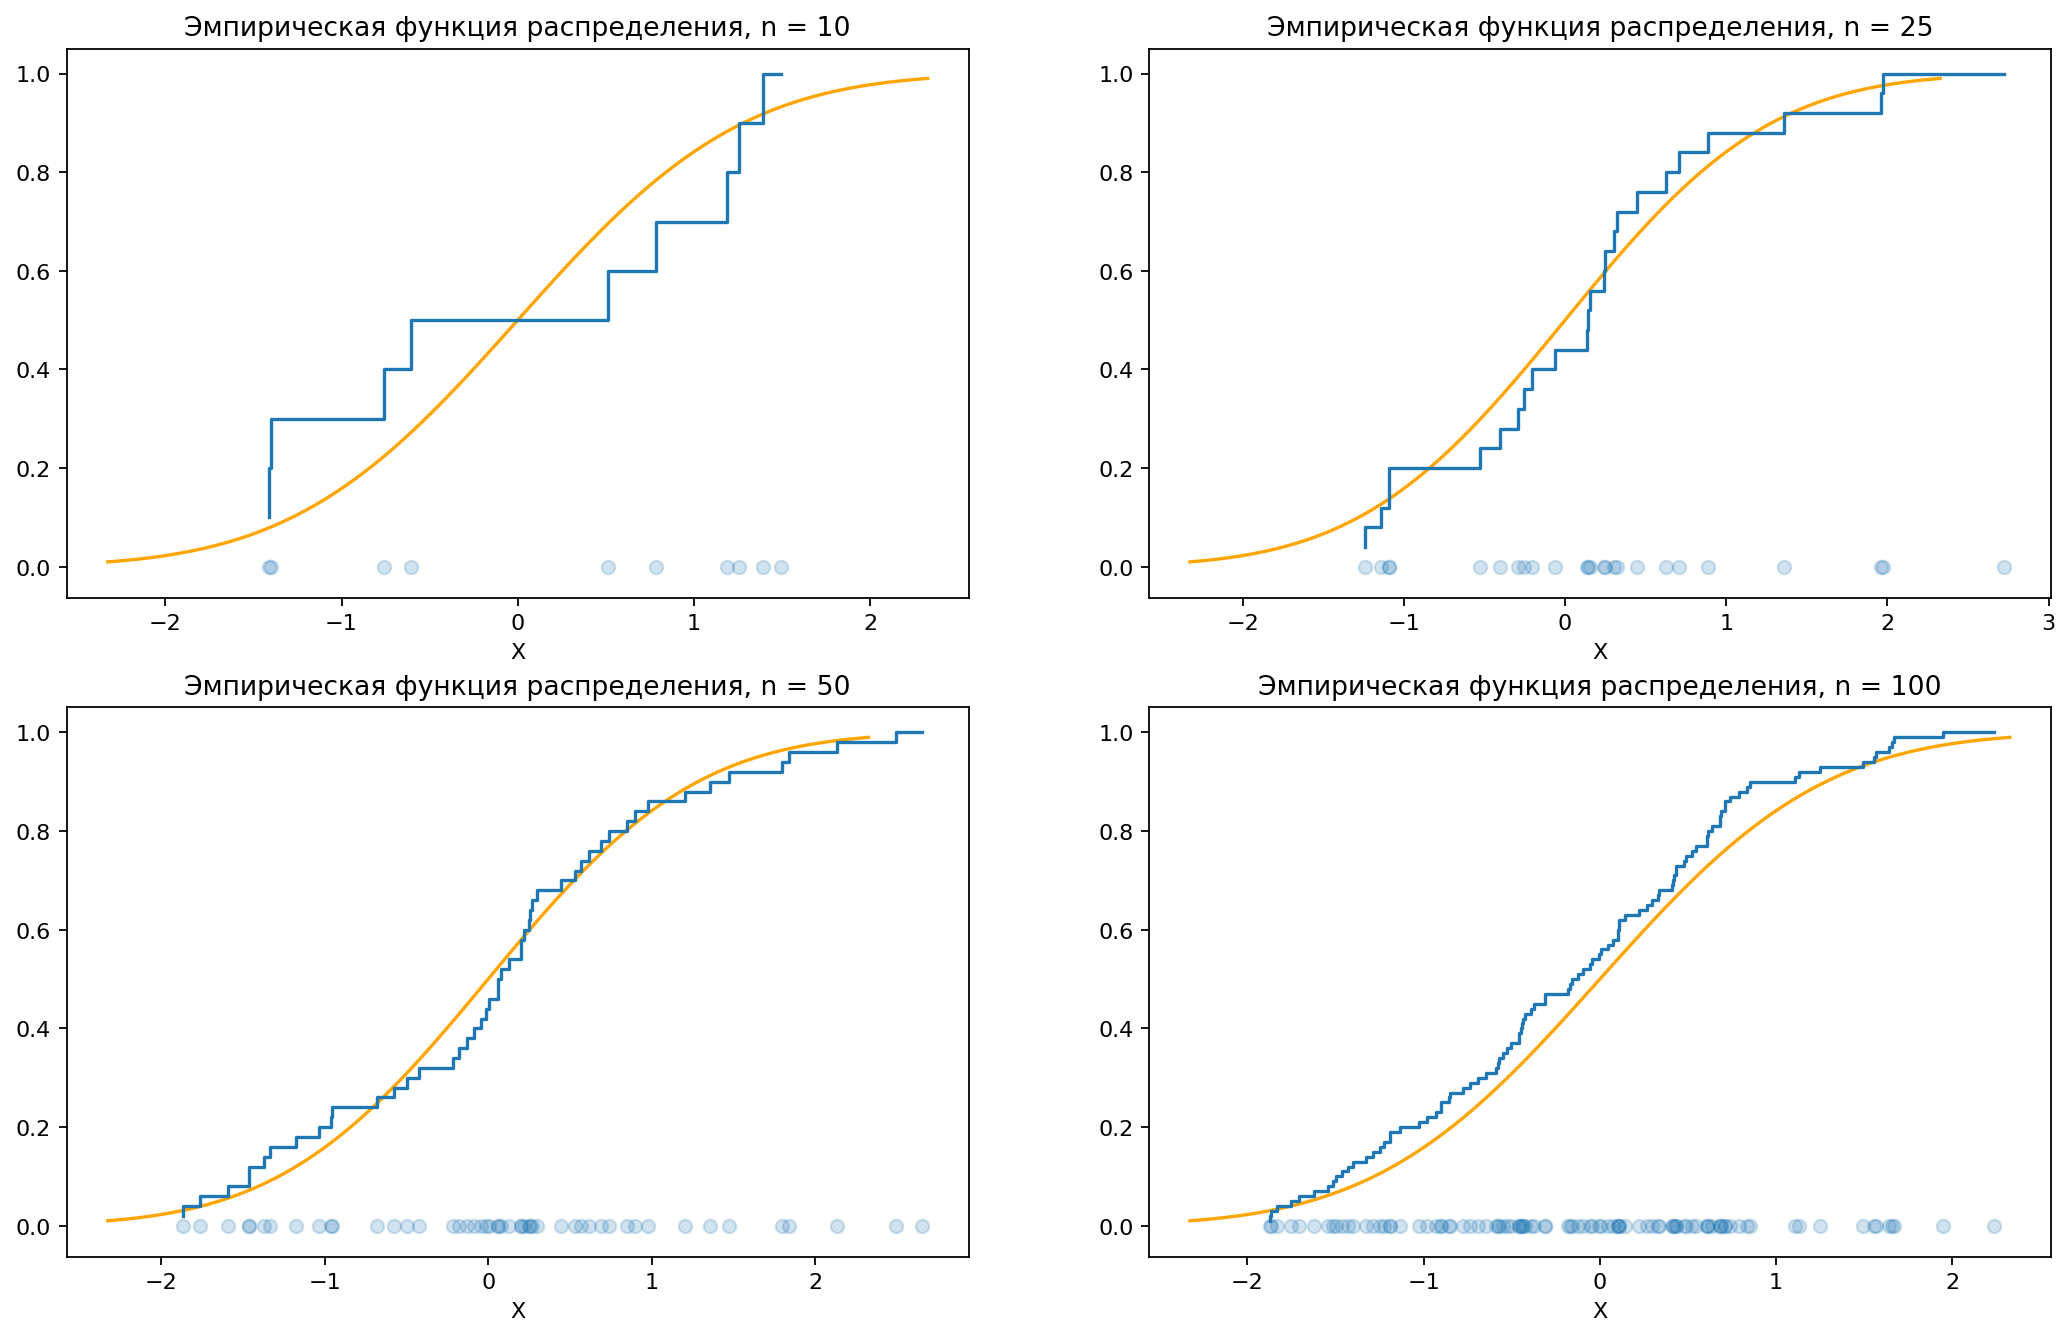

In [7]:
# строим эмпирические функции распределения по подвыборкам
def plot_func(place, X, Y, n):
    axes = plt.subplot(place)
    axes.plot(grid, st.norm.cdf(grid, scale=1), color='orange')
    axes.step(X, Y, color='tab:blue')
    axes.scatter(X, np.zeros(len(X)), color='tab:blue', marker='o', alpha=0.2)
    axes.set_title('Эмпирическая функция распределения, n = {}'.format(n))
    axes.set_xlabel('X')

grid = np.linspace(st.norm.ppf(0.01, scale=1), st.norm.ppf(0.99, scale=1), 100)

figure(num=None, figsize=(16, 10), dpi=80)
plot_func(221, X_10, Y_10, 10)
plot_func(222, X_25, Y_25, 25)
plot_func(223, X_50, Y_50, 50)
plot_func(224, X_100, Y_100, 100)
plt.show()

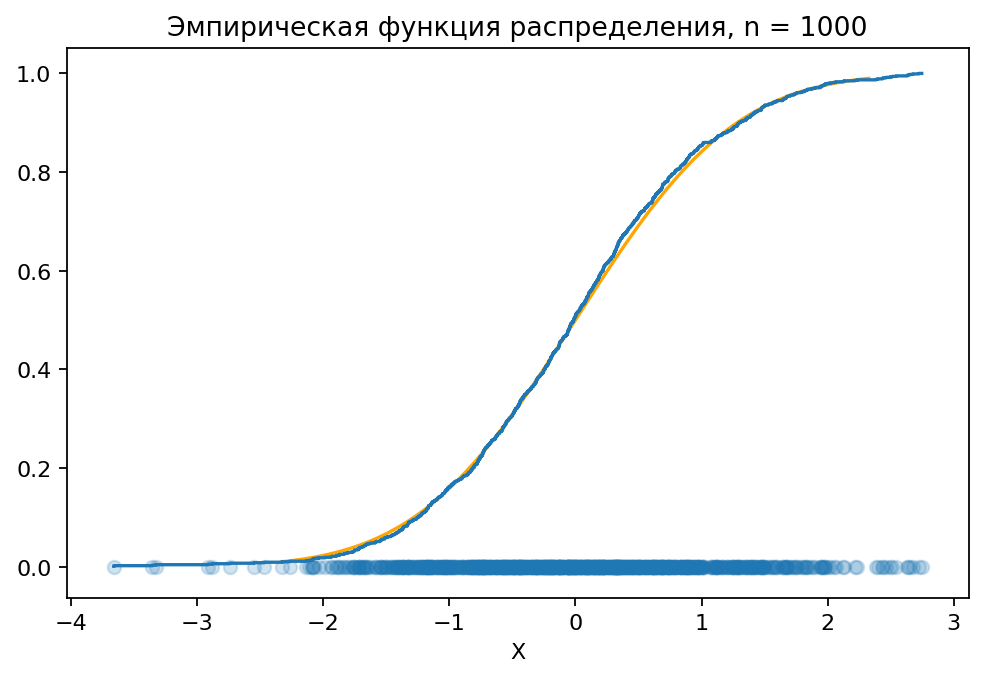

In [8]:
figure(num=None, figsize=(16, 10), dpi=80)
plot_func(222, X, Y, 1000)
plt.show()

### Задание 2. Задача Бюффона о бросании иглы

Классическая формулировка задачи выглядит так:

На разлинованный лист бумаги, расстояния между линиями $r=1$ бросают иглы длиной $L < r$. Какова вероятность того, что игла попадет на линию? 

Для этой задачи существует теоретическое решение:

$$p = \dfrac{2L}{r\pi}\ \ \ \ \ (1)$$.

**Задание**

Проведем эксперимент, найдем вероятность пересечения иглой линии из эксперимента. С помощью теоретического решения найдем значение числа $\pi$.

https://ru.wikipedia.org/wiki/Задача_Бюффона_о_бросании_иглы

Сгенерируем две случайные величины $X1$ и $Y1$ из равномерного распределения. Это будут координаты одно из концов иглы. Сгенерируем случайную величину $\alpha$ из $U[0, 2\pi]$, она будет отвечать за угол между иглой и горизонтальной осью. Так как длина иглы $L$ задана изначально, то координаты конца иглы:

$$X_2 = X_1 + L \cdot \cos(\alpha)$$
$$Y_2 = Y_1 + L \cdot \sin(\alpha)$$

Отобразите на полотне отрезки, соответсвующие каждой игле. Проведите горизонтальные линии, пригодится https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html. (Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

Так как расстояние между горизонтальными линиями 1, то пересечение иглы с линией можно найти так: спроецируем иглы на вертикальную ось, получим отрезки $[y_2, y_1]$. Если в пределах отрезка $[y_2, y_1]$ лежит целое число, значит проекция, а соотвественно и игла, пересекают горизонтальную ось. Найдем долю игл, пересекающий горизонтальную линию. Эта доля и будет оценкой вероятности в формуле (1). Зная вероятность, из формулы (1) можно выразить значение числа $\pi$.


In [9]:
# задаем параметры и создаем списки с координатами концов иглы
r = 1
L = st.uniform.rvs()
exp_size = 500

alpha_list, X1_list, X2_list, Y1_list, Y2_list = [],[],[],[],[]

for i in range(exp_size):
    alpha = st.uniform.rvs(loc=0, scale=2*np.pi)
    alpha_list.append(alpha)
    
    X1 = st.uniform.rvs(0, 20)
    X1_list.append(X1)
    
    Y1 = st.uniform.rvs(0, 10)
    Y1_list.append(Y1)
    

    X2 = X1 + L * np.cos(alpha)
    X2_list.append(X2)
    Y2 = Y1 + L * np.sin(alpha) 
    Y2_list.append(Y2)

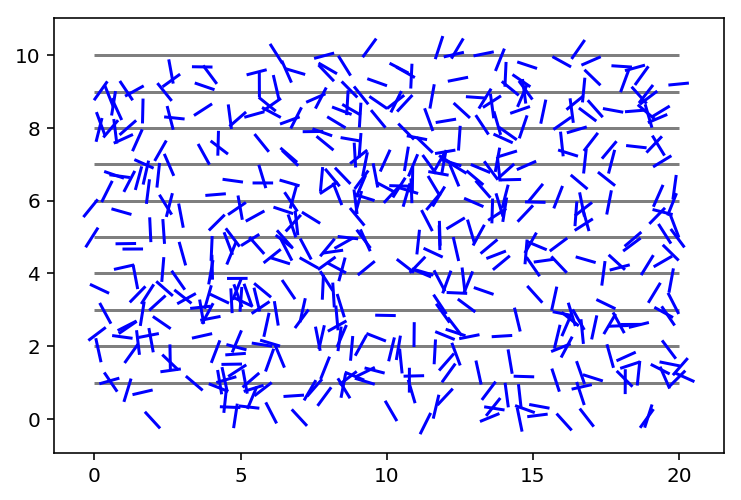

In [10]:
# рисуем иголки и горизонтальные линии
x_values = [X1_list, X2_list]
y_values = [Y1_list, Y2_list]

plt.plot(x_values, y_values, 'b')

plt.hlines(y=np.linspace(1, 10, 10), xmin = 0, xmax = 20, alpha=0.5)
plt.show()

In [11]:
# считаем количество иголок, которые пересекают линии
lines = np.linspace(1, 10, 10)
Y = list(zip(Y1_list, Y2_list))
cross_line = 0

for i in range(500):
    for line in lines:
        needle = Y[i]
        if line >= min(needle) and line <= max(needle):
            cross_line += 1

In [12]:
p = cross_line / exp_size
pi = (2*L*r) / p
pi

3.096610428926862